(tf_basics)=

# Unit 2.2: Transfer Function Basics

## Learning Outcomes

In this unit, students will...

- Derive transfer functions by hand.
- Derive transfer functions using symbolic math.
- Numerically evaluate and plot the impulse, step, and forced responses of a system.
- Analytically derive the step and forced responses of a system.
- Explain the physical significance of time responses.

### Slido Poll 

[EG-247 Week 2: Lecture 3](https://app.sli.do/event/5evuttyBJtysomqzzQbMc9)

:::{note}
This unit is based on the MATLAB LiveScript `TransferFunctionBasics.mlx` from the curriculum module [Transfer Function Analysis of Dynamic Systems](https://github.com/MathWorks-Teaching-Resources/Transfer-Function-Analysis-of-Dynamic-Systems).

Some of the examples rely on interactive features of MATLAB that are not readily reproduced in these notes. To make use of these facilities, you are advised to access the script directly from the project in MATLAB online.

These materials © Copyright 2023 The MathWorks™, Inc. (See {ref}`mathworks_license`).
:::

In [20]:
%% Lecturer: set up the TransferFunctions project for in class execution of exercise tests and activities.

% Setup MATLAB to use the TransferFunctionBasics.mlx LiveScript in class.
% I am assuming that this is on the MATLAB Drive

format compact; 
setappdata(0, "MKernel_plot_format", 'svg')
% Change this to local set up where this Jupyter book is run
cd '/Users/eechris/MATLAB-Drive/Repositories/Transfer-Function-Analysis-of-Dynamic-Systems'
open('TransferFunctions.prj')

## Electric vehicles: the wave of the future?

![Essential components of an electric vehicle](images/car1.png)

Essential components of an electric vehicle

Electric vehicles (EV) may well be the future of environmentally sustainable travel. But what makes it possible for an EV to be more efficient than a gas vehicle while still providing enough power to accelerate to and maintain high speeds? The answer lies in efficient power electronics. In this unit, you will learn about transfer functions and use them to analyze the dynamics of several essential components of an electric vehicle.

### Slido poll

What is a transfer function?

## Transfer Function Definition

Consider a dynamic system with a single input function and a single output function:

![A dynamic system represented as a block diagram in the time domain](images/bdt.png)

This is known as a **SISO** (Single Input Single Output) system. In general, the system $g$ is defined through a differential equation: $g(u, x, \dot{x}, \ddot{x},\ldots) = 0$.

The **transfer function** is defined as

$$G(s) = \frac{Y(s)}{U(s)},$$

the ratio of the Laplace transform of the output $Y(s) = \mathcal{L}\{y(t)\}$ to the Laplace transform of the input $U(s) = \mathcal{L}\{u(t)\}$. The transfer function $G(s)$ maps inputs $U$ to outputs $Y$:

![A dynamic system represented as a block diagram in the complex frequency domain](images/bds.png)

:::{tip} If you need to brush up on Laplace transforms, review them in: {ref}`tf_concepts`.
:::

### Example 1

![example](images/write.png)

Find the transfer function of a mass-spring-damper that is dynamically forced by an arbitrary function $u(t)$. Assume that the system is initially at rest ($x(0)=0$ and $\dot{x}(0) = 0$).

![Mass-spring-damper diagram](images/smd.png)
Mass-spring-damper diagram

### Solution to Example 1

The equation of motion for a mass-spring-damper is

$$m \ddot{x} + c \dot{x} + k x = u$$

Using the properties of the Laplace transform for derivatives, the Laplace transform is

$$m[s^2 X - sx(0) - \dot{x}(0)] + c [s X - x(0)] + kX = U$$

Applying $x(0) = 0$ and $\dot{x}(0) = 0$:

$$ms^2 X  + c s X  + kX = U$$

Solving for the ratio of the input to the output yields the transfer function:

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{m s^2 + cs + k}$$

### Exercise 1

![example](images/write.png)

Find the transfer function of a simple pendulum with zero initial conditions using the linearized equations of motion. Consider that the pendulum is being driven by an arbitrary forcing function $u(t)$ (note that any angle dependence of the forcing would be baked into $u(t)$. The equations of motion are:

$$\ddot{\theta} + \frac{g}{l} \theta = u$$

where $g$ is acceleration due to gravity and $l$ is the length of the pendulum.

Record your answer below in variable `pendulumTF` in terms of the symbolic variables `g`, `l`, and `s`.

#### Solution to Exercise 1

$$
\mathcal{L}\left\{\ddot{\theta} + \frac{g}{l} \theta = u\right\} = \left(s^2\Theta(s) - sf(0) - f'(0)\right) + \frac{g}{l}\Theta(s) = U(s)
$$

Assuming zero initial conditions, $f(0) = f'(0) = 0$, then

$$
\begin{align}
s^2\Theta(s) + \frac{g}{l}\Theta(s) &= U(s) \\
\left(s^2 + \frac{g}{l}\right)\Theta(s) &= U(s)
\end{align}
$$

From this the transfer function $G(s)$ is

$$
\begin{align}
G(s) &= \frac{\Theta(s)}{U(s)}\\
&= \frac{1}{s^2 + \left(g/l\right)}
\end{align}
$$

We can now enter this result into the code below.

In [21]:
syms g l s
% Record your answer in pendulumTF
pendulumTF = 1/(s^2 + g/l);

## Electric vehicle dynamic system

In this module, you'll investigate the dynamics of components of an electric vehicle's electrical and mechanical systems (EV) using transfer functions. The major components of the EV system are represented in the diagram below.

![Simplified EV power system](images/ev_power_system.png)
Simplified EV power system

There are two domains represented in this diagram: the electrical and physical domains. The DC motor couples the domains by converting electrical energy to mechanical. Inside the electrical domain, there are two essential conversions.

- The AC power source (120/240V) is converted to a high voltage DC source (200-800V) used to charge the battery pack.
- The battery's high voltage DC (200-800V) is converted to a low voltage (12V or 48V) by a buck converter for use by low voltage systems.

In this unit, you will investigate several paradigmatic components present (or like those present) in EVs.

## Transfer function representation of simple vehicle motion

The most intuitive part of the electric vehicle system is the motion of the vehicle itself.

![A focus on modeling the motion of the vehicle](images/car_motion.png)
In this unit, we'll focus on modeling the motion of the vehicle.

In a straightforward model, an EV (and indeed, any vehicle) can be modeled as a simple mass with two forces acting on it: a traction force and a frictional force. The traction force results from the motor applying torque to the wheels.

![A simple vehicle model](images/vehicle_model.png)
A simple vehicle model

### Example 2

(a) Derive the equation of motion for the simple vehicle model and (b) compute the transfer function of the displacement $x(t)$ using the traction force as the input function $u(t)$.

### Solution to Example 2

#### Example 2(a) Differential equation

The displacement of the vehicle is $x(t)$. For simplicity, the frictional force is assumed to be proportional to the velocity $\dot{x}(t)$ with a constant of proportionality $k$:

$$F_\mathrm{friction} = k \dot{x}$$

The traction force varies depending on the output of the motor (among other considerations), so it is treated as an arbitrary function:

$$F_\mathrm{traction} = u(t)$$

With these two forces, Newton's second law implies:

$$m\ddot{x} = -k\dot{x}  + u(t)$$

#### Example 2(b) Transfer function

Computing the Laplace transform of the equation of motion yields

$$m[s^2 X - sx(0) - x'(0)] = - k [s X - x(0)] + U$$

Applying the zero initial conditions and solving for $X/U$ yields

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{ms^2 + ks}$$

:::{note} There are many simplifications present in this vehicle model (especially in the way the frictional forces are modeled). The model is intended to help illustrate the essential concepts of transfer functions, rather than accurately account for the forces present in the true mechanical system.
:::

### Exercise 2

It may be the case that you want to analyze the velocity $v(t)=\dot{x}(t)$ rather than the position $x$. Rewrite the equation of motion

$$m\ddot{x} = -k\dot{x} + f(t)$$

in terms of the velocity, $v(t)=\dot{x}(t)$, and then solve for the transfer function of $v$: $H(s) = V(s)/F(s)$. Record your answer below in `Vtf` in terms of the symbolic variables `s`, `m`, and `k`.

#### Solution to Exercise 2

Let $v = \dot{x}$ then

$$m\ddot{x} = -k\dot{x} + f(t) \rightarrow m\dot{v} = -kv + f(t)$$

So

$$m\dot{v} + kv = f(t)$$

Taking Laplace transform and ignoring initial conditions

$$
\begin{align}
msV(s) + kV(s) &= F(s) \\
\left(ms + k\right)V(s) &= F(s)
\end{align}
$$

Then the transfer function is

$$G(s) = \frac{V(s)}{F(s)} = \frac{1}{ms + k}$$

##### Poll Exercise 2

Write a MATLAB symbolic expression `Vtf` for this transfer function in terms of the symbolic variables `s`, `m`, and `k`

In [22]:
syms m s k % Symbolic variable declarations
% Record the symbolic transfer function here
Vtf = 1/(m*s+ k);

## Impulse response

The impulse response of a system is the output generated from an impulse input. This is also commonly referred to as the natural response.

![Response of a system to an impulse](images/impulse_response.png)
Response of a system to an impulse. While the response may be computed in the $s$-domain, it is shown in the time domain.

Here $\delta(t)$ is the Dirac delta function which has the properties:

$\int_{-\infty}^{\infty} \delta(t) dt = 1 $ and $\delta(t) = 0 \text{ for } t \neq 0$

Think of the unit impulse as giving the system a (very) quick shove at time $t = 0$. The impulse response shows how the system will respond to that shove.

### Reflect

![reflect](images/reflect.png)

Consider the simple vehicle motion model. The input function is the traction force $u(t) = F_\mathrm{traction}(t)$. An impulse input corresponds to an instantaneous force at time $t = 0$.

![A model of a simple vehicle](images/vehicle_model.png)

- Try drawing a plot of the impulse response of the position transfer function $X(s)/F(s)$ in the time domain.
- Try drawing a plot of the impulse response of the velocity transfer function $V(s)/F(s)$ in the time domain.

### Example 3

Plot the impulse response of a mass-spring-damper with zero initial conditions and parameters $m=1$, $c=0.1$, and $k=0.5$.

![Mass-spring-damper diagram](images/smd.png)
Mass-spring-damper diagram

Recall the transfer function of the mass-spring-damper:

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{m s^2 + cs + k}$$

### Solution to Example 3

You can compute the impulse response in MATLAB by defining a transfer function using [`tf`](https://www.mathworks.com/help/control/ref/tf.html) and then evaluating its response using the [`impulse`](https://www.mathworks.com/help/control/ref/lti.impulse.html) function.

The `tf` function has the syntax

```matlab
tf(num,denom)
```

where `num` represents the coefficients of the numerator and denom represents those of the denominator in descending order. Note that a transfer function created using the `tf` function is not a symbolic function and cannot be manipulated with the Symbolic Math Toolbox.

The numerator and denominator of $G$ are defined below[^refer_to_livescript].

In [23]:
m = 1;
c = 0.1;
k = 0.4;
num = [0 0 1];
denom = [m c k];

Call` tf` to build the transfer function.

In [24]:
G = tf(num,denom)


G =
 
          1
  -----------------
  s^2 + 0.1 s + 0.4
 
Continuous-time transfer function.


To plot the impulse response, call the impulse function with the syntax:

```matlab
impulse(H,tFinal)
```

where `H` is the transfer function and `tFinal` is the duration of the simulation.

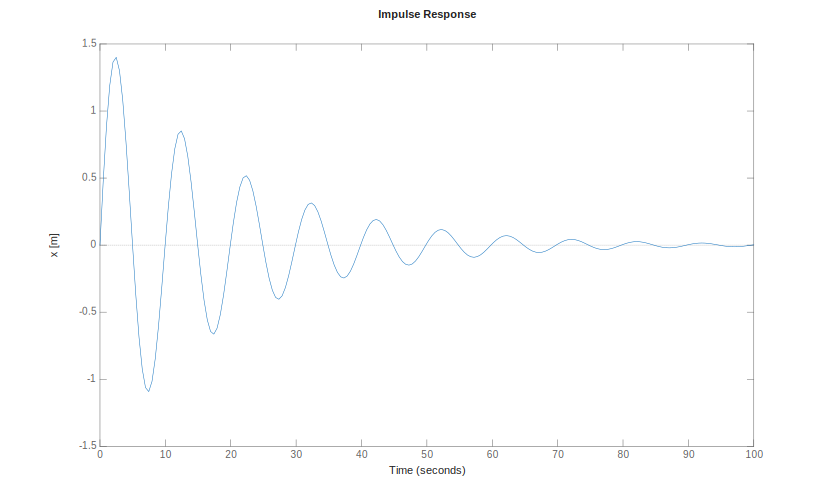

In [25]:
tFinal = 100;
impulse(G,tFinal);
ylabel("x [m]")

### Reflect

![reflect](images/reflect.png)

- How are the damping and spring stiffness reflected in the impulse response?
- If $c$ is increased to 0.5, how will the response change?
- Try setting $c = 0.5$ and recompute the impulse response.
- Try setting $k = 1$ and recompute the impulse response.

### Exercise 3

Consider a simple vehicle with a mass of 1300 kg and a frictional constant of proportionality of $k = 100$ N.s/m. Recall that the simple vehicle motion model has a transfer function:

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{ms^2 + ks}$$

Plot the impulse response of for the first 100 seconds using MATLAB commands by

1. creating the transfer function using the `tf` function
2. plotting the impulse response using `impulse` function

In [26]:
% Parameters
m = 1300;      % kg
k = 100;       % N.s/m
Tfinal = 100;  % seconds

% Transfer function
num = 1;
den = [m, k, 0];

##### Poll exercise 4

In [27]:
% Define trasnsfer function G
G = tf(num,den)


G =
 
         1
  ----------------
  1300 s^2 + 100 s
 
Continuous-time transfer function.


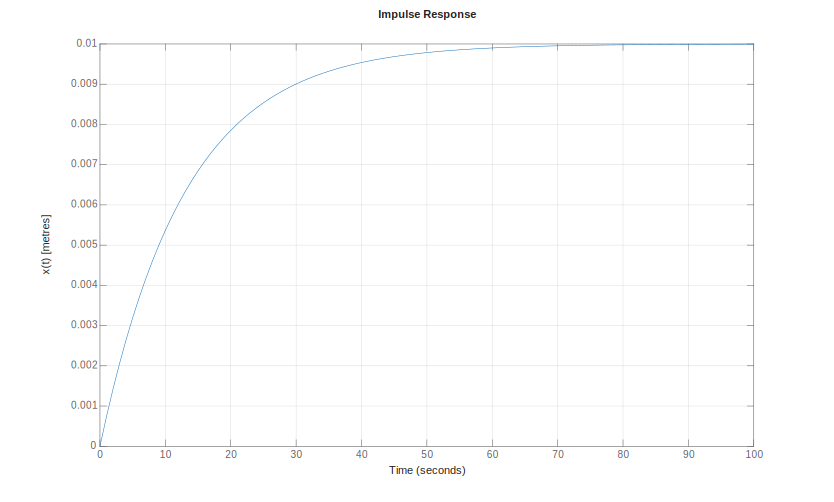

In [28]:
% Plot impulse response
impulse(G, Tfinal)
% Label y axis
ylabel('x(t) [metres]'),grid

### Reflect

![reflect](images/reflect.png)

- How does the impulse response compare to your prediction for the impulse response?
- Physically, what does the long-term behavior of the impulse response represent?
- Define the velocity transfer function $\displaystyle{H(s) = \frac{1}{ms + k}}$ and compute the impulse response in the space below. Physically, what does the limiting behaviour represent?

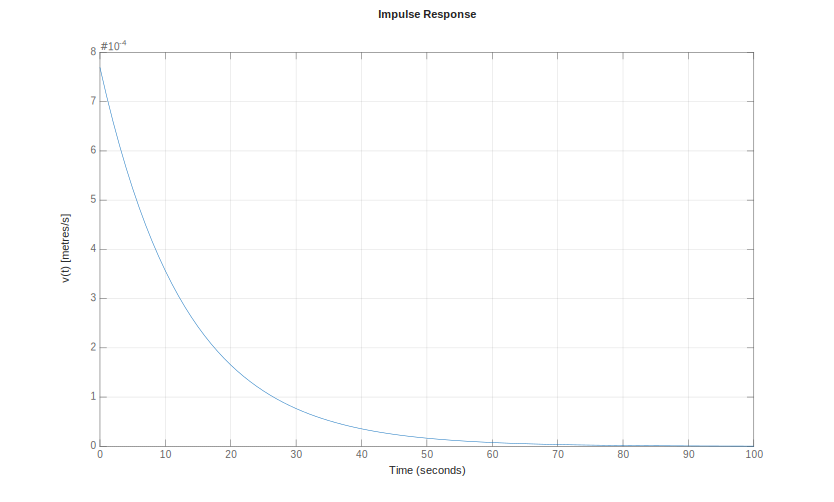

In [29]:
% Velocity TF
num = 1;
den = [m, k];
G2 = tf(num,den);

impulse(G2, Tfinal),ylabel('v(t) [metres/s]'),grid

## Step response

The output generated from a step input is known as the step response.

![Response of a system to a step input](images/step_resp.png)
Response of a system to a step input.

The step response is plotted in the time domain. Think of the step response as the system's response to a sustained constant forcing. In the vehicle model, this would result from continuously running the motor (with the assumption that it produced a constant traction force output).

### Reflect

![reflect](images/reflect.png)

Consider the simple vehicle motion model. The input function is the traction force $u(t) = F_\mathrm{traction}(t)$.

![A model of a simple vehicle](images/vehicle_model.png)

- Try drawing a plot of the step response of the position transfer function $G(s) = X(s)/F(s)$ in the time domain.
- Try drawing a plot of the step response of the velocity transfer function $H(s) = V(s)/F(s)$ in the time domain.

### Exercise 4

Consider a simple vehicle with a mass of 1300 kg and a frictional constant of proportionality of $k = 100$ N.s/m. Recall that the simple vehicle motion model has a transfer function:

$$G(s) = \frac{X(s)}{F(s)} = \frac{1}{ms^2 + ks}$$

Define the transfer function `G` in MATLAB using the `tf` function and then plot the step response for the first 30 seconds using the `step` function. The step function has the syntax

```matlab
step(sys,Tfinal)
```

where `sys` is a dynamic system (here, that's the transfer function `G`) and `Tfinal` is the time to stop the simulation.

In [30]:
% parametershttp://localhost:8888/nbclassic/notebooks/2/transfer_function_basics.md#
m = 1300;    % kg
k = 100;     % N.s/m
Tfinal = 30; % seconds

% transfer function
num = 1;
den = [m, k, 0];

##### Poll exercise 4

In [31]:
G = tf(num,den);

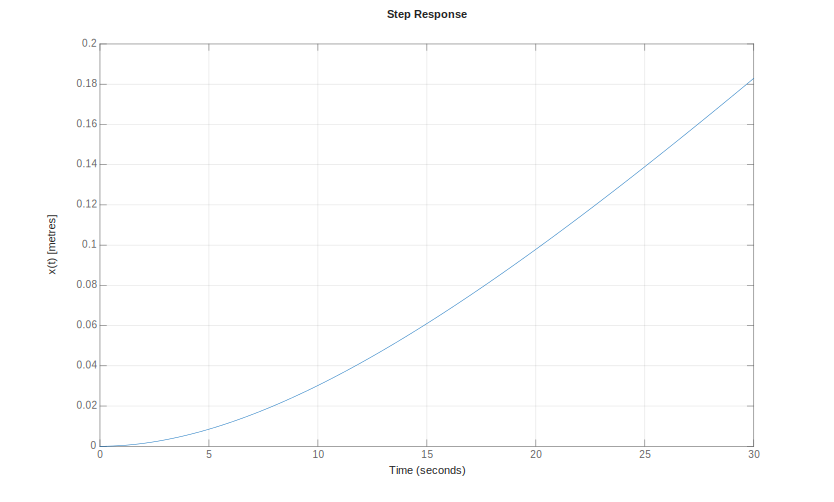

In [32]:
% step response
step(G, Tfinal)
% label graph
ylabel('x(t) [metres]'),grid

### Reflect

![reflect](images/reflect.png)

- How does the step response compare to your prediction?
- What physical action does the initial transient behavior reflect?
- What does the long-term behavior of the step response reflect?

### Exercise 5

Consider the same simple vehicle with a mass of 1300 kg and a frictional constant of proportionality of $k = 100$ N.s/m. This time, however, analyze the vehicle's velocity $v(t)$ instead of its position $x(t)$. Recall that the velocity transfer function is

$$H(s) = \frac{1}{ms + k}$$

Compute the step response of the velocity transfer function and use it to determine the vehicle's maximum velocity undergoing a unit step forcing.

Tfinal =
   100


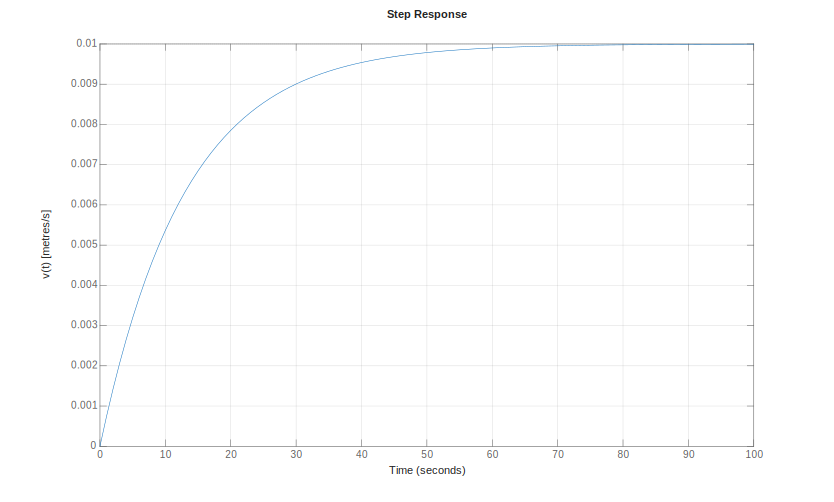

In [33]:
Tfinal = 100
% Velocity transfer function
num = 1;
den = [m k];
G = tf(num,den);
% step response
step(G, Tfinal),ylabel('v(t) [metres/s]'),grid

### Reflection

![reflect](images/reflect.png)

- As you probably noticed, the vehicle's maximum speed under the unit step forcing is only 0.01 m/s, which is about 0.022 mph. That happens because the unit step only applies a traction force of 1 N, which is not nearly enough for a 1300 kg vehicle.
- To create a more realistic response, you can add gain to the system by multiplying the transfer function by a constant and then recomputing the step response. What value of the gain constant will produce a maximum speed of 50 m/s (or 112 mph)?
- Compute the step response of H\*gain in the space below, where gain is the gain constant that will produce a maximum velocity of 50m/s.
- How long does it take for the vehicle to accelerate from 0 to 60 mph (0 to 26.8m/s)?

The extra gain needed to reach 50 m/s would be $50/0.01 = 5000$.

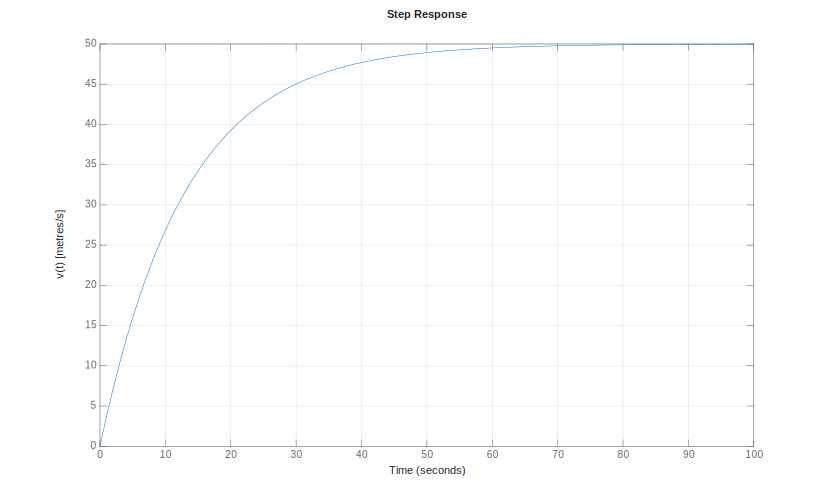

In [34]:
gain = 50/0.01;
% new step response
step(gain*G, Tfinal),ylabel('v(t) [metres/s]'),grid

In this case an acceleration from 0-60 mph is achieved in about 10 seconds.

## Analytic computation of the impulse and step responses

At this point, you be wondering: "how are the impulse and step responses calculated?"

In MATLAB, they are numerically estimated.

In many common cases, it is also possible to derive the response analytically.

While in practice solving for the analytic response is typically unnecessary, it is a valuable exercise to develop further intuition.

To analytically solve for the impulse or step response:

1. take the Laplace transform of the input function
2. solve for $X(s)$
3. back-transform $X(s)$ to obtain the time-domain response $x(t)$

If you don't want to perform Step 1 by hand, you can simply use a table or the `laplace` function. You can complete Step 3 using a transform table or the [`ilaplace`](https://www.mathworks.com/help/symbolic/ilaplace.html) function from the Symbolic Math Toolbox.

### Example 4

#### 4(a)

Compute the analytic impulse response for the simple vehicle model using its position transfer function.

#### 4(b)

Set $m = 1300$ and $k = 100$. Then plot the analytic impulse result and compare it to the solution found using the `impulse` function.

### Solution to Example 4

#### Solution to Example 4(a)

Recall that the position transfer function for the simple vehicle model was:

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{ms^2 + ks}$$

Start by computing the Laplace transform of the input forcing function $\delta(t)$:

$$U(s) = \int_{0}^\infty \delta(t) e^{-st} dt = e^{-st}|_{t = 0} = 1$$

This implies that

$$X(s)= \frac{1}{ms^2 + ks}$$

At this point, you can refer to a table or use the `ilaplace` function to evaluate the inverse Laplace transform.

In [35]:
syms m k positive
syms s x
X = 1/(m*s^2 + k*s)
x = ilaplace(X)

X =
1/(m*s^2 + k*s)
x =
1/k - exp(-(k*t)/m)/k


#### Solution to Example 4(b)

First define the transfer function using `tf` and then compute the impulse response.

In [36]:
m = 1300;
k = 100;
Xs = tf([0 0 1],[m k 0]);
[x,t] = impulse(Xs);

Now compute the analytic solution on the same interval and plot the comparison.

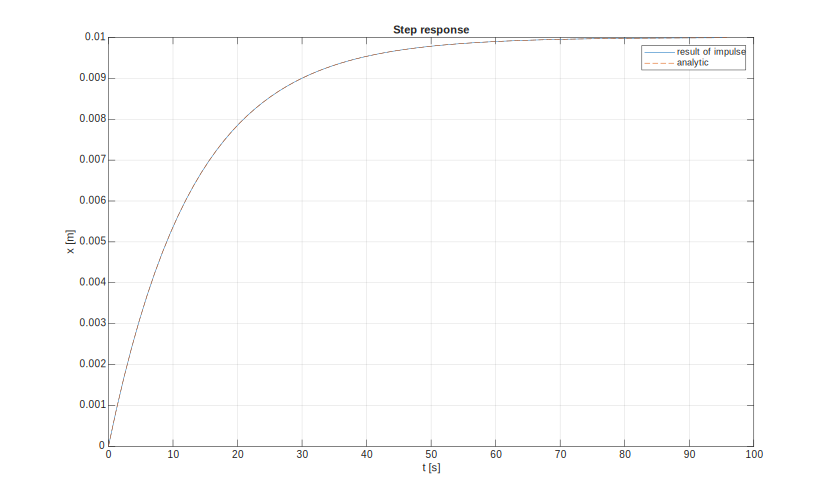

In [37]:
xAnalytic = 1/k - exp(-k*t/m)/k;
plot(t,x,t,xAnalytic,'--')
grid
legend("result of impulse", "analytic")
xlabel("t [s]")
ylabel("x [m]")
title("Step response")

(hw2-exercise-1)=

### Homework Exercise 1

Complete this exercise for homework using the MATLAB LiveScript `TransferFunctionBasics.mlx` from the curriculum module [Transfer Function Analysis of Dynamic Systems](https://github.com/MathWorks-Teaching-Resources/Transfer-Function-Analysis-of-Dynamic-Systems).

#### Homework 1(a)

Compute the analytic **step** response for the vehicle position transfer function. Recall that the position transfer function for the simple vehicle model was:

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{ms^2 + ks}$$

Store the output in symbolic variable `x` using the pre-defined symbolic variables.

#### Homework 1(b)

Set $m = 1300$ and $k = 100$. Then plot the analytic step result you computed in (a). Also, plot the step response calculated using the `step` function.

In [38]:
% This computes the step response
m = 1300;
k = 100;
Xs = tf([0 0 1],[m k 0]);
[x,t] = step(Xs,20);

Evaluate your analytic solution here in terms of the array `t` using the constant values of `k` and `m`. Plot the result together with the output of the step function.

In [39]:
% Create your plot here

## Forced response

It is also possible to compute the response of a system to an arbitrary input function .

![Forced response of a system](images/forced_response.png)
Response of a system to a square wave.

Analytically, this can be accomplished by computing $U(s)$ and subsequently finding the inverse Laplace transform of $X(s)$. In cases where the analytic expression does not exist, you can estimate the response numerically using the [`lsim`](https://www.mathworks.com/help/control/ref/lti.lsim.html) function.

(hw2-activity-1)=

### Homework Activity

![activity](images/activity.png)

As this activity contains interactive elements, you should complete it in the MATLAB LiveScript `TransferFunctionBasics.mlx`. Here we present one example plot and have documented the activity so you can do for homework.

In this activity, you will analyze the response of the mass-spring-damper system

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{m s^2 + cs + k}$$

The mass-spring-damper is assumed to start at rest and is driven by an input function $u(t)$.

#### Example response

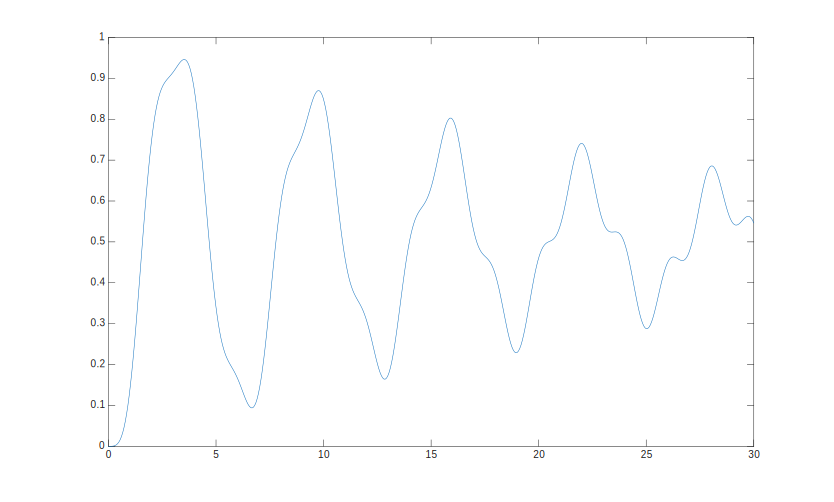

In [40]:
m = 1;
c = 0.1;
k = 1;
freq = 0.25; % Frequency in Hz.
tfinal = 30; % Simulation duration.
t = linspace(0,tfinal,500);
u = sin(2*pi*freq*t).^2;

% Compute and plot the response
G = tf([0 0 1],[m c k]); % The transfer function
[x,t] = lsim(G,u,t); % Simulate the response using lsim
plot(t,x)

#### Part 1. Familiarize yourself with the activity.

1. Adjust the input function u using the dropdown and observe the responses.
2. Adjust the mass-spring-damper parameters and the input frequency to observe the changes to the response.
3. Check the "animate" box to show an animation of the mass-spring-damper. You can turn this on or off during the remainder of the activity as you prefer.

#### Part 2. Find the resonant frequency.

1. It is a well-known phenomenon that systems will become unstable if they are driven at their resonant frequency. Try extending the simulation time by increasing tfinal. Is the system being driven at the resonant frequency?
2. You should notice that the transient response is characterized by two frequencies: the driving frequency and the mass-spring-damper's natural frequency. Is the natural frequency of the oscillator larger or smaller than the driving (input) frequency?
3. Adjust the input frequency so that it matches the natural frequency of the mass-spring-damper. Do you observe resonant oscillations?
4. Set the damping to zero. If you are at (or very close to) the resonant frequency, you should observe that the response will grow without bound.
5. Try driving the oscillator with a different input function. Does the function choice affect the resonant oscillations?

(hw2-exercise-2)=

### Homework Exercise 2

![exercise](images/write.png)

In this exercise, you will compute the analytic response of the mass-spring-damper to a sine wave input function and compare the result to the numerical values computed by `lsim`. For this exercise, assume the mass-spring-damper parameters are $m = 1$, $c = 0$, and $k = 1$. The transfer function is therefore

$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{s^2 + 1}$$

You can perform your analytic computations by hand or in MATLAB using the Symbolic Math Toolbox. When using symbolic math, make sure to declare your symbolic variables before using them. For example:

```matlab
syms f real   % Real symbolic variable f
syms t s      % Symbolic variables t and s
```

Complete the exercise in the MATLAB LiveScript `TransferFunctionBasics.mlx`.

#### Homework Exercise 2(a)

Compute the Laplace transform of the input function:

$$u(t) = \sin(2\pi f t)$$

where $f$ is a constant (the frequency in Hz).

In [41]:
% Write your code here

#### Homework Exercise 2(b)

Find the expression for the response in the Laplace domain: $X(s)$.

In [42]:
% Write your code here

#### Homework Exercise 2(c)

Compute the inverse Laplace transform of $X(s)$ to identify the time-domain response $x(t)$.

In [43]:
% Write your code here

#### Homework Exercise 2(d)

Evaluate the analytic response for $f = 0.16$ on the interval $[0, 50]$ and plot it.

**Hint**: If you computed symbolically in MATLAB, you can convert it to a function handle using [`matlabFunction`](https://www.mathworks.com/help/symbolic/matlabfunction.html) and evaluate that instead of writing out the expression yourself. For example:

```matlab
xfunc = matlabFunction(x)    % Create a function handle for a symbolic expression x
xeval = xfunc(freq,t);       % Evaluate the function handle based on its input arguments
```

In [44]:
% Write your code here

(e) Use the [`lsim`](https://www.mathworks.com/help/control/ref/lti.lsim.html) function to compute the same response and plot it together with the analytic response.

In [45]:
% Write your code here

(homework2)=

## Homework 2: Transfer Function Basics

1. Register with the MathWorks (if you haven't already) using your Swansea University email and install your own copy of the curriculum module [Transfer Function Analysis of Dynamic Systems](https://github.com/MathWorks-Teaching-Resources/Transfer-Function-Analysis-of-Dynamic-Systems) into the online MATLAB version[^installation].
2. Open the `TransferFunctionBasics.mlx` activity.
3. Complete the Exercises and Activities and add your own notes to the LiveScript file in response to the Reflection prompts given above.

- {ref}`hw2-exercise-1`
- {ref}`hw2-activity-1`
- {ref}`hw2-exercise-2`

## Further exploration

![explore](images/navigation.png)

- You can find more information about using transfer functions in MATLAB[^eg243] in the video: [Transfer Functions in MATLAB](https://uk.mathworks.com/videos/transfer-functions-in-matlab-100912.html).
- Want to learn more about mass-spring-damper systems? Check out the [Mass-Spring-Damper Systems courseware](https://uk.mathworks.com/matlabcentral/fileexchange/94585-mass-spring-damper-systems?s_tid=FX_rc2_behav) module.
- Learn more about responses in the [MATLAB Tech Talk: Control Systems in Practice, Part 9: The Step Response](https://uk.mathworks.com/videos/control-systems-in-practice-part-9-the-step-response-1593067191882.html)[^eg243].
  Want a little more of the theory? Check out Brian Douglas' video: [Control Systems Lectures - Transfer Functions](https://www.youtube.com/watch?v=RJleGwXorUk&ab_channel=BrianDouglas)[^eg243].

## Footnotes

[^refer_to_livescript]: The MATLAB live script `TransferFunctionBasics.mlx` has sliders to make the interactive adjustment of the parameters `m`, `c` and `k` possible.
[^eg243]: These resources are useful for those of you also studying control systems this semester.
[^solutions]: MATLAB solutions to selected exercises are provided in the online notes.